In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def CreateDecoderAdjacencyMat(n, m, bias):
        # Initialize adjacency matrix
        total_length = 2 * n + m + int(bias)
        adj = np.zeros((total_length, total_length))

        # Connections for V1 (first n units)
        for i in range(n):
            adj[i, 2 * n : 2 * n + m] = 1  # Connect to hidden units only
            adj[i, i] = 0  # No self-connection
            adj[i, n : 2 * n] = 0  # No connections to V2
            adj[i, 0:n] = 0  # No connections to V1 (other visible units)

        # Connections for V2 (next n units)
        for i in range(n, 2 * n):
            adj[i, 2 * n : 2 * n + m] = 1  # Connect to hidden units only
            adj[i, i] = 0  # No self-connection
            adj[i, 0:n] = 0  # No connections to V1
            adj[i, n : 2 * n] = 0  # No connections to V2 (other visible units)

        # Connections for hidden units (last m units)
        for i in range(2 * n, 2 * n + m):
            adj[i, :] = 1  # Connect to all units
            adj[i, 2 * n : 2 * n + m] = 0  # No connections among hidden units

        # Connect bias to all
        if bias:
            adj[total_length - 1, :] = 1
            adj[:, total_length - 1] = 1

        return torch.tensor(adj, dtype=torch.float32)

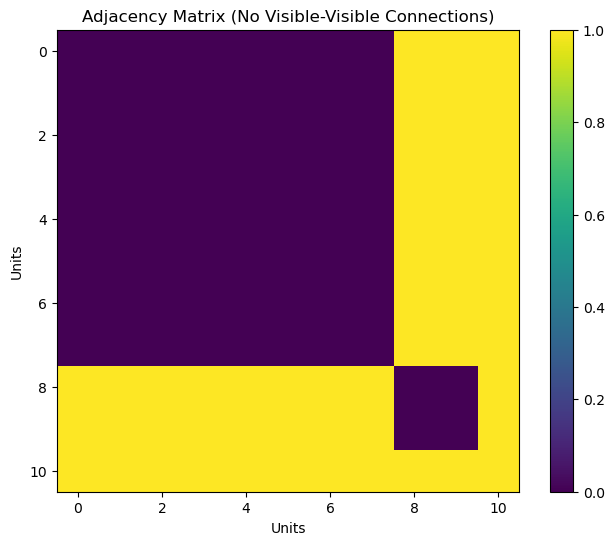

In [10]:
# Parameters
nv = 8  # Number of visible units (V1 + V2)
nh = 2  # Number of hidden units
bias = True  # Include bias unit

adj_matrix = CreateDecoderAdjacencyMat(nv // 2, nh, bias).numpy()

# Visualize the adjacency matrix
plt.figure(figsize=(8, 6))
plt.imshow(adj_matrix, cmap='viridis')
plt.title("Adjacency Matrix (No Visible-Visible Connections)")
plt.xlabel("Units")
plt.ylabel("Units")
plt.colorbar()
plt.show()